In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from tqdm import tqdm

from src.water import Water

In [44]:
path = 'beauford.npz'
with np.load(path) as data:
    dem = data['beauford']

# downsample and remove negative values
dem = dem[::7, ::10][:, :234]
dem = np.where(dem < 0, 0, dem)
dem.shape

(234, 234)

In [45]:
houses_x = np.array([117, 119, 120, 115, 130])
houses_y = np.array([100, 115, 123, 119, 139])

/var/folders/l_/zjyw1l0d37x3lbbq6x4vvs_00000gn/T/ipykernel_95721/1896412566.py:2: RuntimeWarning: divide by zero encountered in log
  plt.contour(np.log(dem), levels=100, zorder=0)


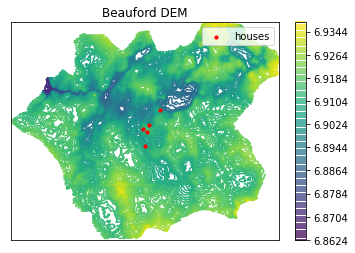

In [46]:
plt.scatter(houses_x, houses_y, c='r', s=10, label="houses", zorder=1)
plt.contour(np.log(dem), levels=100, zorder=0)
plt.legend()
plt.colorbar()
plt.title("Beauford DEM")
plt.xticks([])
plt.yticks([])
plt.savefig("imgs/beauford_dem.png")

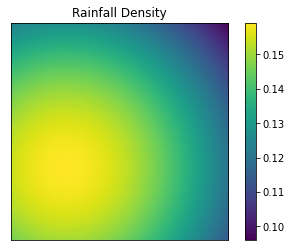

In [47]:
x = np.linspace(0, 1, dem.shape[1])
y = np.linspace(0, 1, dem.shape[0])
xm, ym = np.meshgrid(x, y)
pos = np.dstack((xm, ym))
rv = stats.multivariate_normal([0.25, 0.33], np.eye(2))
rain = rv.pdf(pos)

plt.imshow(np.flip(rain, axis=0))
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title("Rainfall Density")
plt.savefig("imgs/rainfall_density.png")

In [48]:
def heights_at_houses(water: Water, houses_x, houses_y):
    heights = []
    for x, y in zip(houses_x, houses_y):
        heights.append(water.water_level[int(x), int(y)])
    return np.array(heights)

def run(dem, rain, houses_x, houses_y, n_steps):
    water = Water(ground_level=dem, chance_rain=rain)
    house_levels = np.zeros([n_steps, len(houses_x)])
    for step in tqdm(range(n_steps)):
        water.step()
        house_levels[step] = heights_at_houses(water, houses_x, houses_y)
    return house_levels

house_levels = run(dem, rain, houses_x, houses_y, n_steps=1000)

100%|██████████| 1000/1000 [02:14<00:00,  7.43it/s]


Text(0.5, 1.0, 'Water Levels')

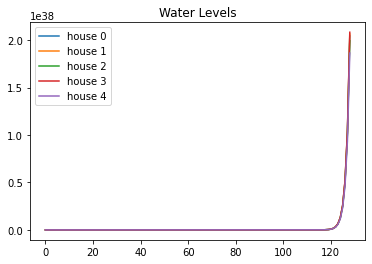

In [49]:
for i in range(house_levels.shape[1]):
    plt.plot(house_levels[:, i], label=f"house {i}")
plt.legend()
plt.title("Water Levels")